# Sentiment Analysis on Amazon Product Reviews

## 1. Dataset Overview
- **Dataset Description**:
  - Analyze an Amazon product review dataset containing textual reviews (`reviewText`) and corresponding sentiment labels (`Positive`).
  - Sentiment is binary: 1 for positive, 0 for negative.
- **Objective**:
  - Predict the sentiment of a product review based on its textual content.


#### flow chart of analysis
Load Data
↓
Check nulls & imbalance
↓
Handle null values (text + label)
↓
Text cleaning
↓
Train–test split (stratified)
↓
Lemmatization / normalization
↓
Vectorization (fit on train only)
↓
Handle imbalance (train only)
↓
Train model
↓
Evaluate on test data

Raw text
↓
Cleaning
↓
Tokenization
↓
(Optional: stemming / lemmatization)
↓
Vectorization
↓
ML Model

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import string 

from wordcloud import WordCloud 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re
import string
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/amazon.csv'
df = pd.read_csv(url)
df.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [4]:
df.columns

Index(['reviewText', 'Positive'], dtype='object')

In [5]:
df.dtypes

reviewText    object
Positive       int64
dtype: object

In [6]:
df['reviewText'] [2] # check the individual row in a column of data set

'this is a really cool game. there are a bunch of levels and you can find golden eggs. super fun.'

In [7]:
df.shape

(20000, 2)

In [8]:
df[1:3]

,reviewText,Positive
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1


In [9]:
df1 = df.copy()
df2 = df.copy()

# 2. Data Preprocessing
- Handle missing values, if any.
- Perform text preprocessing on the `reviewText` column:
  - Convert text to lowercase.
  - Remove stop words, punctuation, and special characters.
  - Tokenize and lemmatize text data.
- Split the dataset into training and testing sets.


In [118]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek

### Handle missing values

In [11]:
df.isnull().sum()

reviewText    0
Positive      0
dtype: int64

##### Comments on null value handling
There is no missing values in the data set columns as per above analysis by code df.isnull().sum()

In [12]:
#convert text to lowercase
df['reviewText'] = df['reviewText'].str.lower()

In [13]:
df[1:3] #checking after converting to lowercase

,reviewText,Positive
1,this is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1


### Text cleaning 

In [14]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [15]:
english_stopwords = set(stopwords.words('english'))
english_punctuation = string.punctuation

In [16]:
def clean_text(text):
    # Make sure text is a string
    text = str(text)
    
    # Remove punctuation
    remove_punc = [char for char in text if char not in english_punctuation]
    clean_text = ''.join(remove_punc) # char joining

    #Tokenize
    words = clean_text.split()
    
    #Remove stopwords
    text = [word for word in words if word.lower() not in english_stopwords]
    return" ".join(text)

In [17]:
df['reviewText'] = df['reviewText'].apply(clean_text) 

In [18]:
df['reviewText'][0] # after cleaning the text

'one best apps acording bunch people agree bombs eggs pigs tnt king pigs realustic stuff'

In [19]:
df1['reviewText'][0] #before cleaning the text

'This is a one of the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff'

## Seperation of target varibale (y) from other features (x) in the data set

In [20]:
x = df.drop(columns=['Positive']) # act same as "X = df.drop('column name', axis=1)"
y = df['Positive']  # Here, y is the target variable column's value

In [21]:
x.shape

(20000, 1)

In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


## Splitting of Data to Train and Test set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
x_train.shape

(16000, 1)

In [26]:
xtesting, xvalidation, ytesting, yvalidation = train_test_split(x_test, y_test, train_size=.50, random_state=85) # 15% test , 15% val and rest 70% is train

In [27]:
xtesting.shape

(2000, 1)

In [28]:
x_train.dtypes

reviewText    object
dtype: object

## Create word clouds

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='hamming')
    plt.axis('off')
    plt.title(title)

negative_text = ' '.join(df[df['Positive'] == 0]['reviewText']) #Negative sentiment
positive_text = ' '.join(df[df['Positive'] == 1]['reviewText']) #Positive sentiment

### Negative review words

plot_wordcloud(negative_text, 'Negative Review')
plt.show()

### Positive Review Words

plot_wordcloud(positive_text, 'Positive Review')
plt.show()

## Lemmatization

In [29]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [30]:
# POS tag mapping before lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [31]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)

    lemmatized_words = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in pos_tags
        if word.isalpha()
    ]

    return " ".join(lemmatized_words)

In [32]:
# lemmatization applied on whole data set
df['reviewText'] = (
    df['reviewText']
    .fillna("")
    .astype(str)
    .apply(lemmatize_text)
)

In [34]:
df['reviewText'][2] # after lemmatization

'really cool game bunch level find golden egg super fun'

In [35]:
df1['reviewText'][2]  # before lemmatization

'this is a really cool game. there are a bunch of levels and you can find golden eggs. super fun.'

In [36]:
# lemmatization applied on train data set
x_train['reviewText'] = (
    x_train['reviewText']
    .fillna("")
    .astype(str)
    .apply(lemmatize_text)
)

In [37]:
x_train['reviewText'][2]

'really cool game bunch level find golden egg super fun'

In [38]:
x_train.shape

(16000, 1)

In [39]:
df.shape

(20000, 2)

### x_train and x_test are DataFrames and converting them to  list for tfidf vectorization 

In [40]:
x_train_list = x_train['reviewText'].tolist()   # astype(str) ensures all entries are strings 
x_test_list  = x_test['reviewText'].tolist()  #tolist() converts it into a Python list (one element per document)

- TfidfVectorizer expects a 1D iterable of strings, like a pandas Series or a list of strings.
- If we pass a DataFrame of shape (16000, 1) directly, scikit-learn sometimes interprets it as a single object, treating the entire column as one “document”.
- That’s why without transforming to panda data series or list of strings the tfidf vectorizer output will show (1, 1) — 1 sample, 1 feature.

### TF-IDF vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# fit_transform → learns vocabulary & IDF from train set
# transform → applies the learned vocabulary to test set

In [42]:
# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # limit vocab to 5000 words

# Fit on TRAINING data only
x_train_vec = tfidf.fit_transform(x_train_list)

# Transform TEST data using the same vectorizer
x_test_vec = tfidf.transform(x_test_list)

In [43]:
x_train_vec.shape

(16000, 5000)

#### Imbalance data handling 

In [44]:
y.value_counts() #from total data

Positive
1    15233
0     4767
Name: count, dtype: int64

In [45]:
y_train.value_counts  () # from train set data

Positive
1    12191
0     3809
Name: count, dtype: int64

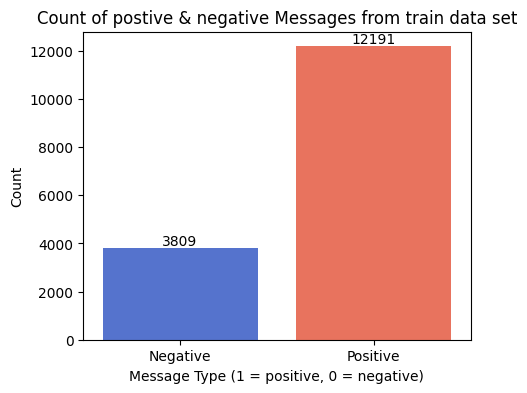

In [46]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(x=y_train, palette=['royalblue', 'tomato'])

plt.xlabel("Message Type (1 = positive, 0 = negative)")
plt.ylabel("Count")
plt.title("Count of postive & negative Messages from train data set")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks([1, 0], ["Positive", "Negative"])
plt.show()

In [47]:
smt = SMOTETomek(random_state=42) 

In [48]:
print(len(x_train))
print(type(x_train))

16000
<class 'pandas.core.frame.DataFrame'>


In [49]:
print(x_train_vec.shape)

(16000, 5000)


In [50]:
x_train_res, y_train_res = smt.fit_resample(x_train_vec, y_train)

print(len(x_train_texts))
print(type(x_train_texts))

In [51]:
y_train_res.value_counts() # Aftar balancing the data with SMOTETomek resampler

Positive
1    12189
0    12189
Name: count, dtype: int64

# 3. Model Selection
- Choose at least three machine learning models for sentiment classification:
  - Statistical Models:
    - Logistic Regression
    - Random Forest
    - Support Vector Machine (SVM)
    - Naïve Bayes
    - Gradient Boosting (e.g., XGBoost, AdaBoost, CatBoost)
  - Neural Models:
    - LSTM (Long Short-Term Memory)
    - GRUs (Gated Recurrent Units)


In [52]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.impute import SimpleImputer # impute the missing null value in the data set
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay

## 4. Model Training
- Train each selected model on the training dataset.
- Utilize vectorization techniques for text data:
  - TF-IDF (Term Frequency-Inverse Document Frequency)
  - Word embeddings (e.g., Word2Vec, GloVe)


## Random Forest, Catboost, SVM

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_clf = RandomForestClassifier()

In [55]:
rf_clf.fit(x_train_res,y_train_res)

RandomForestClassifier()

In [56]:
y_pred_rf = rf_clf.predict(x_test_vec)

# Evaluate the model
from sklearn.metrics import accuracy_score
print("Testing Accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))

Testing Accuracy for Random Forest: 0.854


In [57]:
print(f'f1-score:{f1_score(y_test, y_pred_rf)},\nprecision-score:{precision_score(y_test, y_pred_rf)},\nrecall-score:{recall_score(y_test, y_pred_rf)}')

f1-score:0.9062299293513166,
precision-score:0.8857501569365976,
recall-score:0.9276791584483892


### CatBoost Model

In [58]:
#pip install catboost

In [59]:
import catboost as cb
from catboost import CatBoostClassifier, Pool, cv
import warnings
warnings.filterwarnings('ignore')

In [60]:
cat_clf = CatBoostClassifier(learning_rate=0.05,loss_function='Logloss') # Use MultiClass' for multiclass classification

In [61]:
cat_clf.fit(x_train_res,y_train_res)

0:	learn: 0.6732166	total: 445ms	remaining: 7m 24s
1:	learn: 0.6551117	total: 641ms	remaining: 5m 19s
2:	learn: 0.6375721	total: 835ms	remaining: 4m 37s
3:	learn: 0.6230901	total: 1.05s	remaining: 4m 20s
4:	learn: 0.6099225	total: 1.24s	remaining: 4m 7s
5:	learn: 0.5982984	total: 1.43s	remaining: 3m 57s
6:	learn: 0.5877722	total: 1.63s	remaining: 3m 51s
7:	learn: 0.5782479	total: 1.83s	remaining: 3m 46s
8:	learn: 0.5693946	total: 2.02s	remaining: 3m 42s
9:	learn: 0.5616332	total: 2.21s	remaining: 3m 39s
10:	learn: 0.5535834	total: 2.41s	remaining: 3m 36s
11:	learn: 0.5468098	total: 2.6s	remaining: 3m 33s
12:	learn: 0.5413226	total: 2.79s	remaining: 3m 32s
13:	learn: 0.5350500	total: 2.99s	remaining: 3m 30s
14:	learn: 0.5305712	total: 3.19s	remaining: 3m 29s
15:	learn: 0.5251653	total: 3.38s	remaining: 3m 27s
16:	learn: 0.5202106	total: 3.57s	remaining: 3m 26s
17:	learn: 0.5164660	total: 3.77s	remaining: 3m 25s
18:	learn: 0.5126916	total: 3.96s	remaining: 3m 24s
19:	learn: 0.5089904	tot

In [82]:
y_pred_cat = cat_clf.predict(x_test_vec)

# Evaluate the model
from sklearn.metrics import accuracy_score
print("Testing Accuracy for CatBoost Classifier:", accuracy_score(y_test, y_pred_cat))

Testing Accuracy for CatBoost Classifier: 0.855


In [83]:
print(f'f1-score:{f1_score(y_test, y_pred_cat)},\nprecision-score:{precision_score(y_test, y_pred_cat)},\nrecall-score:{recall_score(y_test, y_pred_cat)}')

f1-score:0.9009562841530054,
precision-score:0.937455579246624,
recall-score:0.8671926364234056


#### Support vector machine (SVM) 

In [63]:
from sklearn.svm import SVC # classifier
#from sklearn.svm import SVR # regressor

In [64]:
svm_clf= SVC(kernel='linear')  # kernel can be linear, rbf or poly depends on data

In [65]:
svm_clf.fit(x_train_res, y_train_res)

SVC(kernel='linear')

In [66]:
y_pred_svm = svm_clf.predict(x_test_vec)

# Evaluate the model
from sklearn.metrics import accuracy_score
print("Testing Accuracy for Support Vector Machine:", accuracy_score(y_test, y_pred_svm))

Testing Accuracy for Support Vector Machine: 0.852


In [67]:
print(f'f1-score:{f1_score(y_test, y_pred_svm)},\nprecision-score:{precision_score(y_test, y_pred_svm)},\nrecall-score:{recall_score(y_test, y_pred_svm)}')

f1-score:0.8984562607204116,
precision-score:0.9393830703012912,
recall-score:0.8609467455621301


## Build LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
maxlen = 200  
embedding_dim = 128  

lstm_model = Sequential()

lstm_model.add(Embedding(input_dim=vocab_size,  # Use input_dim, not vocab_size
                         output_dim=embedding_dim,  
                         input_length=maxlen)) 
lstm_model.add(LSTM(128, dropout=0.2 ))  #recurrent_dropout=0.2

lstm_model.add(Dense(1, activation='sigmoid')) #output layer

Compile the model
lstm_model.compile(loss='binary_crossentropy',
                   optimizer='adam', metrics=['accuracy'])


lstm_model.build(input_shape=(None, maxlen))
lstm_model.summary()

lstm_history = lstm_model.fit(x_train_res, y_train_res, 
                              epochs=1, 
                              batch_size=64, 
                              validation_data=(x_test_vec, y_test))  # here x_test_vec is the processed feature for analysis

lstm_loss, lstm_acc = lstm_model.evaluate(x_test_vec, y_test, verbose=2) 
print(f'LSTM Test Accuracy: {lstm_acc:.4f}')

def plot_history(history, title):
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['binary_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.ylabel('Binary Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

y_pred_lstm = lstm_model.predict(x_test_vec)

- Assuming y_pred_lstm contains probabilities
- Convert probabilities to binary predictions using threshold (usually 0.5)
y_pred_classes = (y_pred_lstm > 0.5).astype(int)

print(f'f1-score:{f1_score(y_test, y_pred_classes)},\nprecision-score:{precision_score(y_test, y_pred_classes)},\nrecall-score:{recall_score(y_test, y_pred_classes)}')

## GRU

In [89]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
vocab_size = 5000
maxlen = 150
embedding_dim = 128

gru_model = Sequential([
    Input(shape=(maxlen,)), 
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim),
    GRU(64, dropout=0.2),
    Dense(1, activation='sigmoid')
])

gru_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 150, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 677,313 (2.58 MB)

 Trainable params: 677,313 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
gru_history = gru_model.fit(
    x_train_res,
    y_train_res,
    validation_data=(x_test_vec, y_test),
    epochs=5,
    batch_size=32
)

Epoch 1/5
762/762 ━━━━━━━━━━━━━━━━━━━━ 2927s 4s/step - accuracy: 0.5020 - loss: 0.6936 - val_accuracy: 0.7605 - val_loss: 0.6821
Epoch 2/5
762/762 ━━━━━━━━━━━━━━━━━━━━ 2945s 4s/step - accuracy: 0.4947 - loss: 0.6934 - val_accuracy: 0.2395 - val_loss: 0.7020
Epoch 3/5
762/762 ━━━━━━━━━━━━━━━━━━━━ 2987s 4s/step - accuracy: 0.5003 - loss: 0.6933 - val_accuracy: 0.7605 - val_loss: 0.6918
Epoch 4/5
762/762 ━━━━━━━━━━━━━━━━━━━━ 2969s 4s/step - accuracy: 0.4939 - loss: 0.6933 - val_accuracy: 0.2395 - val_loss: 0.6941
Epoch 5/5
762/762 ━━━━━━━━━━━━━━━━━━━━ 2947s 4s/step - accuracy: 0.4945 - loss: 0.6933 - val_accuracy: 0.7605 - val_loss: 0.6914


In [101]:
# Evaluate LSTM
gru_loss, gru_acc = gru_model.evaluate(x_test_vec, y_test, verbose=2) 
print(f'GRU Test Accuracy: {gru_acc:.4f}')

125/125 - 67s - 534ms/step - accuracy: 0.7605 - loss: 0.6914
GRU Test Accuracy: 0.7605


In [102]:
y_pred_gru = gru_model.predict(x_test_vec)

125/125 ━━━━━━━━━━━━━━━━━━━━ 67s 534ms/step


In [103]:
y_pred_classes_gru = (y_pred_gru > 0.5).astype(int)

In [104]:
print(f'f1-score:{f1_score(y_test, y_pred_classes_gru)},\nprecision-score:{precision_score(y_test, y_pred_classes_gru)},\nrecall-score:{recall_score(y_test, y_pred_classes_gru)}')

f1-score:0.863959102527691,
precision-score:0.7605,
recall-score:1.0


# 5. Formal Evaluation
- Evaluate the performance of each model on the testing set using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - Confusion Matrix


In [107]:
accuracy_scores = {
    "Random Forest" : accuracy_score(y_test, y_pred_rf),
    "CatBoost": accuracy_score(y_test, y_pred_cat),
    "SVM" : accuracy_score(y_test, y_pred_svm),
    "GRU" : accuracy_score(y_test, y_pred_classes_gru)}

f1_scores = {"Random Forest" : f1_score(y_test, y_pred_rf),
    "CatBoost": f1_score(y_test, y_pred_cat),
    "SVM" : f1_score(y_test, y_pred_svm),
    "GRU" : f1_score(y_test, y_pred_classes_gru)} 

recall_scores = {"Random Forest" : recall_score(y_test, y_pred_rf),
                 "CatBoost": recall_score(y_test, y_pred_cat),
                "SVM" : recall_score(y_test, y_pred_svm),
                "GRU" : recall_score(y_test,y_pred_classes_gru)}

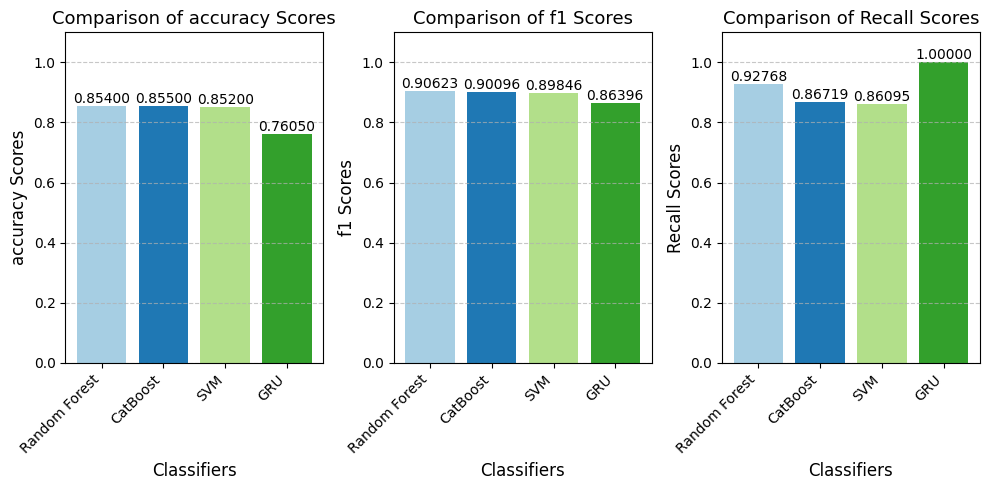

In [111]:
plt.figure(figsize=(10, 5))

plt.subplot(1,3,1) # Creates a grid of plots (1 row × 2 columns)
colors = plt.cm.Paired(np.arange(len(accuracy_scores)))  # Used a colormap for different bar colors
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.5f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('accuracy Scores', fontsize=12)
plt.title('Comparison of accuracy Scores', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)  # Extend limit slightly above 1 for better visibility of text
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1,3,2)
colors = plt.cm.Paired(np.arange(len(f1_scores)))  # Used a colormap for different bar colors
bars = plt.bar(f1_scores.keys(), f1_scores.values(), color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.5f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('f1 Scores', fontsize=12)
plt.title('Comparison of f1 Scores', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)  # Extend limit slightly above 1 for better visibility of text
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1,3,3)
colors = plt.cm.Paired(np.arange(len(recall_scores)))  # Used a colormap for different bar colors
bars = plt.bar(recall_scores.keys(), recall_scores.values(), color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.5f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Recall Scores', fontsize=12)
plt.title('Comparison of Recall Scores', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)  # Extend limit slightly above 1 for better visibility of text
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()

# Comments on models accuracy
- Accuracy score indicates that the statistical classifier model performs better than the neural classifier model.
  This happens may be due to small to medium data set for training for neural model. However, neural model is better for large data set over 10k.
  In addition, neural models are sensitive to imbalance data set whereas the statistical models can handle the imbalance data set better.
- Due to data imbalance (more positive class than the negative) the GRU model learns the trivial solution "Always predict positive". Therefore the recall value is 1 which is hiher than other statistical model which is misleading in terms of performance evaluation. Therefore, we need to evaluate the confusion matrix to understand the overall performance of the model for a data set analaysis.
- However, Recall (Sensitivity) means the ability to detect positives when they're actually positive. Whereas, specificity means ability to detect negatives when they're actually negative. For GRU the specificity is 0 and recall value is 1. 

In [112]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf) # y_test = original y, y_pred_lg=predicted y
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_gru = confusion_matrix(y_test, y_pred_classes_gru)
print('Comparison of Confusion Matrix for Classifier Models')
print(f'Random Forest:\n{conf_matrix_rf}, \nCatBoost: \n{conf_matrix_cat}')
print(f'SVM: \n{conf_matrix_svm},\nGRU: \n{conf_matrix_gru}') #GRU: \n{conf_matrix_gru}

Comparison of Confusion Matrix for Classifier Models
Random Forest:
[[ 594  364]
 [ 220 2822]], 
CatBoost: 
[[ 782  176]
 [ 404 2638]]
SVM: 
[[ 789  169]
 [ 423 2619]],
GRU: 
[[   0  958]
 [   0 3042]]


# 6. Hyperparameter Tuning
- Perform hyperparameter tuning for selected models using:
  - Grid Search
  - Random Search
- Explain the chosen hyperparameters and justify their selection.


In [70]:
from sklearn.model_selection import RandomizedSearchCV

#### Randomized Search for Random Forest

In [109]:
param_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", 0.3],
    "bootstrap": [True]
}

In [111]:
rf_random_search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_rf,
    n_iter=20,
    cv=3
)

In [112]:
rf_random_search.fit(x_train_res, y_train_res)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 0.3],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]})

In [113]:
rf_random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [122]:
# Using best tuned model on the untouched test set
rf_best_model = rf_random_search.best_estimator_  # or whatever tuned model is
rf_final_predictions = rf_best_model.predict(x_test_vec)

# Checking the final performance
from sklearn.metrics import accuracy_score, classification_report
rf_final_accuracy = accuracy_score(y_test, rf_final_predictions)
print(f"Final Test Accuracy for rf: {rf_final_accuracy:.7f}")

Final Test Accuracy for rf: 0.8532500


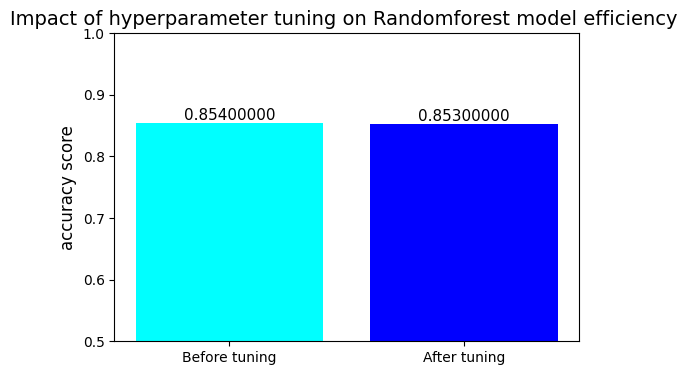

In [110]:
Tuning_Type = ['Before tuning', 'After tuning']
Random_Forest = [0.854, 0.853]

plt.figure(figsize=(6,4))
x=np.arange(len(Tuning_Type))

bars = plt.bar(Tuning_Type, Random_Forest, color=['cyan', 'blue'])  #plt.bar() : Creates a bar chart in matplotlib 

for bar in bars:
    height = bar.get_height() # For each bar, gets its height (the y-value, which is the mae score).
    plt.text(bar.get_x() + bar.get_width()/2., # #bar.get_x(): Gets the bar's left-edge x-coordinate. #bar.get_width()/2.: Gets half the bar's width. # bar.get_x() + bar.get_width()/2.: Calculates the center of the bar.
             height,
             f'{height:.8f}',
             ha='center', va='bottom', fontsize=11)
    
plt.ylabel('accuracy score', fontsize=12)
plt.title('Impact of hyperparameter tuning on Randomforest model efficiency ', fontsize=14)
plt.ylim(0.5, 1.0)
plt.show()    #Displays the complete figure with all subplots

#### Randomized Search for CatBoost

In [114]:
param_cat = {
    "iterations": [300, 500],
    "learning_rate": [0.05, 0.1],
    "depth": [4, 6, 8],
    "l2_leaf_reg": [3, 5, 7],
    "loss_function": ["Logloss"]
}

In [115]:
cat_random_search= RandomizedSearchCV(
    cat_clf,
    param_distributions=param_cat,
    n_iter=20,
    cv=3
)

In [116]:
cat_random_search.fit(x_train_res, y_train_res)

0:	learn: 0.6552600	total: 44ms	remaining: 21.9s
1:	learn: 0.6207944	total: 81.2ms	remaining: 20.2s
2:	learn: 0.5946220	total: 119ms	remaining: 19.6s
3:	learn: 0.5749119	total: 155ms	remaining: 19.2s
4:	learn: 0.5569053	total: 196ms	remaining: 19.4s
5:	learn: 0.5386176	total: 234ms	remaining: 19.3s
6:	learn: 0.5267131	total: 273ms	remaining: 19.2s
7:	learn: 0.5141346	total: 311ms	remaining: 19.1s
8:	learn: 0.5029230	total: 349ms	remaining: 19s
9:	learn: 0.4948301	total: 387ms	remaining: 19s
10:	learn: 0.4869515	total: 425ms	remaining: 18.9s
11:	learn: 0.4794959	total: 461ms	remaining: 18.8s
12:	learn: 0.4729180	total: 499ms	remaining: 18.7s
13:	learn: 0.4661519	total: 538ms	remaining: 18.7s
14:	learn: 0.4603068	total: 581ms	remaining: 18.8s
15:	learn: 0.4539100	total: 621ms	remaining: 18.8s
16:	learn: 0.4495433	total: 660ms	remaining: 18.7s
17:	learn: 0.4450967	total: 697ms	remaining: 18.7s
18:	learn: 0.4410826	total: 734ms	remaining: 18.6s
19:	learn: 0.4372254	total: 772ms	remaining: 

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001E6686F0140>,
                   n_iter=20,
                   param_distributions={'depth': [4, 6, 8],
                                        'iterations': [300, 500],
                                        'l2_leaf_reg': [3, 5, 7],
                                        'learning_rate': [0.05, 0.1],
                                        'loss_function': ['Logloss']})

In [117]:
cat_random_search.best_params_

{'loss_function': 'Logloss',
 'learning_rate': 0.1,
 'l2_leaf_reg': 7,
 'iterations': 500,
 'depth': 8}

In [121]:
# Using best tuned model on the untouched test set
cat_best_model = cat_random_search.best_estimator_  # or whatever tuned model is
cat_final_predictions = cat_best_model.predict(x_test_vec)

# Checking the final performance
from sklearn.metrics import accuracy_score, classification_report
cat_final_accuracy = accuracy_score(y_test, cat_final_predictions)
print(f"Final Test Accuracy for catboost: {cat_final_accuracy:.7f}")

Final Test Accuracy for catboost: 0.8530000


#### Randomized search for SVM

In [76]:
param_dist = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],  # Skip poly for speed
        'gamma': ['scale', 'auto'],
    }

In [77]:
svm_random_search = RandomizedSearchCV(
    svm_clf,
    param_distributions=param_dist,
    n_iter=30,                 # 🔑 keep small
    scoring="accuracy",              # or 'f1_macro'
    cv=3,
    verbose=2,
    random_state=42
)


In [78]:
svm_random_search.fit(x_train_res, y_train_res)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time= 1.6min
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=  58.5s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=  58.5s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=  52.4s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=  57.7s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=  57.4s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=  58.1s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=  58.6s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=  58.3s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=  57.5s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=  57.9s
[CV] END ....................C=0.001, gamma=auto

RandomizedSearchCV(cv=3, estimator=SVC(kernel='linear'), n_iter=30,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy', verbose=2)

In [79]:
svm_random_search.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 10}

In [80]:
# Using best tuned model on the untouched test set
svm_random_model = svm_random_search.best_estimator_  # or whatever tuned model is
svm_random_predictions = svm_random_model.predict(x_test_vec)

# Checking the final performance
from sklearn.metrics import accuracy_score, classification_report
svm_final_accuracy = accuracy_score(y_test, svm_random_predictions)
print(f"Final Test Accuracy for catboost: {svm_final_accuracy:.7f}")

Final Test Accuracy for catboost: 0.8292500


# 7. Comparative Analysis
- Compare the performance of all models based on evaluation metrics.
- Identify strengths and weaknesses of each model (e.g., speed, accuracy, interpretability).


In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
conf_models = {
    "Random Forest": np.array([[594, 364],
                               [220, 2822]]),

    "CatBoost": np.array([[782, 176],
                          [404, 2638]]),

    "SVM": np.array([[789, 169],
                     [423, 2619]]),

    "GRU": np.array([[0, 958],
                     [0, 3042]])
}


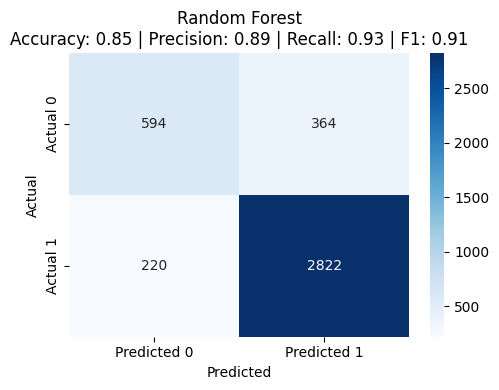

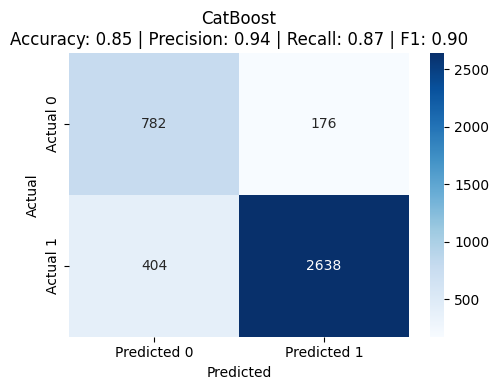

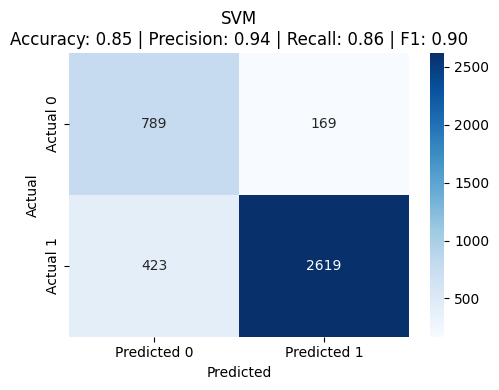

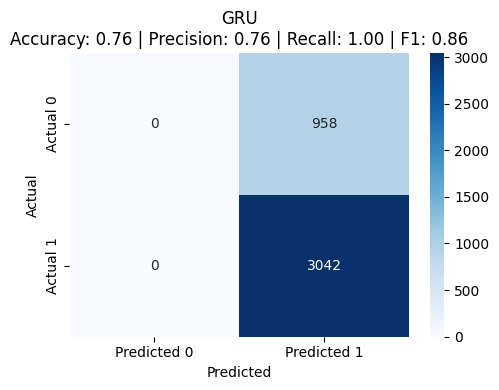

In [116]:
# Confusion matrices

def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    accuracy  = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall    = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score  = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    return accuracy, precision, recall, f1_score

# Plot confusion matrices and metrics
for model, cm in conf_models.items():
    accuracy, precision, recall, f1 = calculate_metrics(cm)

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Predicted 0", "Predicted 1"],
        yticklabels=["Actual 0", "Actual 1"]
    )

    plt.title(
        f"{model}\n"
        f"Accuracy: {accuracy:.2f} | "
        f"Precision: {precision:.2f} | "
        f"Recall: {recall:.2f} | "
        f"F1: {f1:.2f}"
    )

    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()

# Comments on comparative analysis of models

- TP = True Positives (correctly predicted positive);
  FP = False Positives (incorrectly predicted positive);
  FN = False Negatives (incorrectly predicted negative);
  TN = True Negatives (correctly predicted negative)

- accuracy  = (TP + TN) / (TP + TN + FP + FN) (accuracy indicates what proportion of all predictions were correct)
- precision = TP / (TP + FP) or (Precision = True Positives / All Predicted Positives; Precision indicates the faction of actually positive outcome out of all predicted positives)
- recall    = TP / (TP + FN)  (Recall or sensitivity means the ability to detect positives when they're actually positive. in other words, of all actual positive instances, what fraction did correctly identified?)
- f1_score  = 2 * precision * recall / (precision + recall) (It indicates the balanced measure between precision and recall)
- Precision is about the quality of positive predictions; recall is about the quantity of positives that captured.

1. Random Forest (TN=594, FP=364, FN=220, TP=2822)
- Considering the detection of positive outcome, the random forest model shows better performance (having 93% recall value) over all other considered models. 
- In addition, random forest also shows better balanced performance (having 91% f1 score) compared to others (cat:90%, SVM:90% and GRU 86%).
- Recall (Sensitivity) for Positive class = 2822/(2822+220) ≈ 92.8%
- Recall for Negative class (Specificity if neg is positive) = 594/(594+364) ≈ 62.0%. That is not great at catching minority class.

2. CatBoost (TN=782, FP=176, FN=404, TP=2638)
- Although catboost shows better precision for positive class (2638/(2638+176) ≈ 93.75% (higher than random forest)) lower recall for positive class (86%) compared to randomforest.
- Recall for Positive class or sensitivity = 2638/(2638+404) ≈ 86.7% that is lower than RF (92.8%).
- Recall for negative class or specificity ≈782/(782+176)= 81.6%, which is much better than RF (62%). 
- However, it predicts higher false negatives (FN=404) compared to random forest therefore misses more actual positives than RF(FN=220).

3. SVM (TN=789, FP=169, FN=423, TP=2619)

- This model is better for negative class recall compared to all other models. Where, Specificity ≈ 789/(789+169)=82.4%.
- It has higher FN (423) than both catboost (FN=404) and RF(FN=220). Therefore this model is worse for recall of positive class.

4. GRU (TN=0, FP=958, FN=0, TP=3042))
- Although this model shows best performance for perfect recall for positive class = 3042/3042 = 100% (since FN=0).
- However, this model completely fails to detect or recall any true negative class at all. Therefore specificity 0% (0/0+958=0). 
- Model shows overfitting to majority class (predicts positive always).


# 8. Conclusion & Comments
- Summarize the findings of the project. Provide insights into the challenges faced during data preprocessing, model training, and evaluation. Highlight key lessons learned. Add clear and concise comments to the code for each step of the project. Highlight key results, visualizations, and model comparisons.


- In terms of customer sentiment analysis the random forest shows better performance over the other models.
- In customer sentiment analysis, false negatives generally have a greater impact than false positives. This is because when the model incorrectly predicts a review as negative when it is actually positive, the company may overlook valuable customer feedback. As a result, the organization may miss opportunities to reinforce successful product features, increase supply for highly appreciated products, or leverage positive sentiment for marketing and strategic decisions.
- As the random forest detects lowest number of false negative (FN=220) compared to other statistical models (cat:404, svm:423). Therefore, it is better model for sentiment alnalysis of customers of a marketing brand compared to the other models.
- On the contrary, catboost shows better performance in terms of negative class identification compared to other models. which is also important for identification of negative sentiments of the customer to take corrective actions and act accordingly to discontinue the bad products.
- On the other hand GRU model shows biased prediction only detecting the positive outcomes. This may be due to imbalance data type and small data samples.
- Due to resource constraints the grid search not performed for hyperparameter tuning. In addtion neural models were not analyzed for randomized search for hyperparameter tuning. Therefore, we may missed the best hyperparameter for model tuning.
 